In [1]:
import pandas as pd

# Load the fresh data
file_path = 'salary_data_cleaned.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the data
df.head()


,Job Title,Salary Estimate,Job Description,Skills,Rating,Company Name,Location,Size,Founded,Type of ownership,...,job_state,age,python_yn,R_yn,spark,cloud,excel,sql,machine_learning,statistics
0,Assoc Performance Data Scientist,$66K - $70K (Employer est.),"As needed, assist with developing and validati...","Skills: Cloud infrastructure, R, HIPAA, SQL, AWS",2.7,United States Olympic and Paralympic Committee,Remote,501 to 1000 Employees,1894,Nonprofit Organization,...,NaN,130,0,1,0,1,1,1,0,0
1,Data Scientist,$89K - $118K (Employer est.),You possess a strong drive to learn and excel ...,"Skills: TensorFlow, Statistics, Microsoft Exce...",3.6,WEX Inc.,"Portland, ME",1001 to 5000 Employees,1983,Company - Public,...,ME,41,0,1,0,0,1,1,1,1
2,Data Scientist,$113K - $121K (Employer est.),This position will require strong technical sk...,"Skills: Power BI, Azure, Data mining, Big data, R",3.9,TradeStation,Remote,501 to 1000 Employees,1982,Company - Private,...,NaN,42,0,1,0,1,1,0,0,0
3,Data Scientist,$78K - $112K (Glassdoor est.),Execute strategy and support applications of s...,"Skills: Jira, TensorFlow, CI/CD, Computer visi...",3.8,Magna International Inc.,"Troy, MI",10000+ Employees,1957,Company - Public,...,MI,67,0,1,0,0,1,0,0,0
4,Data Scientist,$110K - $200K (Employer est.),3+ years of experience in working in the field...,"Skills: TensorFlow, Software deployment, R, Da...",3.8,"Ingenio, LLC",Remote,201 to 500 Employees,2013,Company - Private,...,NaN,11,0,1,0,0,1,0,0,0


In [2]:
# Display information about the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          719 non-null    object 
 1   Salary Estimate    719 non-null    object 
 2   Job Description    719 non-null    object 
 3   Skills             719 non-null    object 
 4   Rating             719 non-null    float64
 5   Company Name       719 non-null    object 
 6   Location           719 non-null    object 
 7   Size               719 non-null    object 
 8   Founded            719 non-null    int64  
 9   Type of ownership  719 non-null    object 
 10  Industry           719 non-null    object 
 11  Sector             719 non-null    object 
 12  Revenue            719 non-null    object 
 13  hourly             719 non-null    int64  
 14  min_salary         719 non-null    float64
 15  max_salary         719 non-null    float64
 16  avg_salary         719 non

In [3]:
# Check for missing values
df.isnull().sum()


Job Title              0
Salary Estimate        0
Job Description        0
Skills                 0
Rating                 0
Company Name           0
Location               0
Size                   0
Founded                0
Type of ownership      0
Industry               0
Sector                 0
Revenue                0
hourly                 0
min_salary             0
max_salary             0
avg_salary             0
company_txt           20
job_state            155
age                    0
python_yn              0
R_yn                   0
spark                  0
cloud                  0
excel                  0
sql                    0
machine_learning       0
statistics             0
dtype: int64

In [4]:
# Example: Create a new feature for salary range
df['salary_range'] = df['max_salary'] - df['min_salary']

In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
		

In [6]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)


In [7]:
df.job_simp.value_counts()


job_simp
data scientist    597
na                 79
mle                41
manager             2
Name: count, dtype: int64

In [8]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

seniority
na        607
senior    112
Name: count, dtype: int64

In [9]:
# Fix state Los Angeles 
df['job_state'] = df['job_state'].apply(lambda x: 'CA' if isinstance(x, str) and x.strip().lower() == 'los angeles' else x)
df.job_state.value_counts()
#df.drop('job_state',inplace=True,axis=1)
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Skills', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'min_salary', 'max_salary',
       'avg_salary', 'company_txt', 'job_state', 'age', 'python_yn', 'R_yn',
       'spark', 'cloud', 'excel', 'sql', 'machine_learning', 'statistics',
       'salary_range', 'job_simp', 'seniority'],
      dtype='object')

In [10]:
#  Job description length 
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      158
1      161
2      156
3      162
4      126
      ... 
714    160
715    161
716    160
717    162
718    158
Name: desc_len, Length: 719, dtype: int64

In [11]:
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)
df[df.hourly ==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
14,1,90.00,160.00
40,1,90.00,160.00
60,1,86.98,136.96
83,1,90.42,169.34
96,1,90.00,160.00
116,1,86.98,136.96
147,1,90.42,169.34
176,1,90.00,160.00
198,1,86.98,136.96
230,1,90.42,169.34


In [12]:
df.describe()

,Rating,Founded,hourly,min_salary,max_salary,avg_salary,age,python_yn,R_yn,spark,cloud,excel,sql,machine_learning,statistics,salary_range,desc_len
count,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.0,719.000000,719.000000,719.000000,719.000000,719.000000
mean,3.871071,1958.268428,0.036161,110.929291,175.452490,140.965403,65.731572,0.077886,0.969402,0.100139,0.127955,1.0,0.340751,0.296245,0.247566,63.498039,154.129346
std,0.408541,66.717247,0.186821,35.312116,55.423312,44.450470,66.717247,0.268179,0.172346,0.300394,0.334273,0.0,0.474292,0.456918,0.431899,40.068015,10.374799
min,-1.000000,1701.000000,0.000000,31.000000,51.000000,41.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,113.000000
25%,3.700000,1944.000000,0.000000,86.980000,131.000000,109.000000,19.000000,0.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,35.000000,154.000000
50%,3.900000,1976.000000,0.000000,100.000000,167.000000,128.500000,48.000000,0.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,53.000000,158.000000
75%,4.100000,2005.000000,0.000000,129.500000,210.000000,173.000000,80.000000,0.000000,1.000000,0.000000,0.000000,1.0,1.000000,1.000000,0.000000,91.000000,161.000000
max,5.000000,2022.000000,1.000000,230.000000,412.000000,306.000000,323.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,337.000000,162.000000


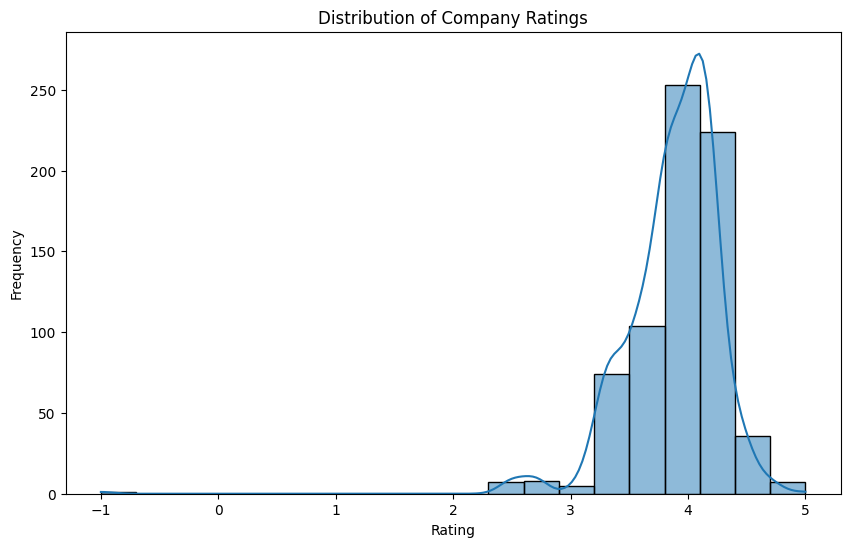

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of Company Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

<Axes: >

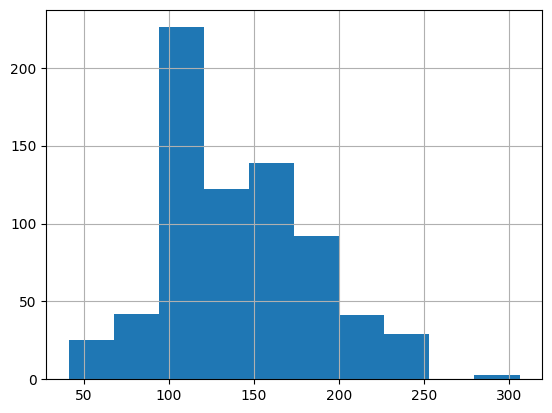

In [14]:
df.avg_salary.hist()

<Axes: >

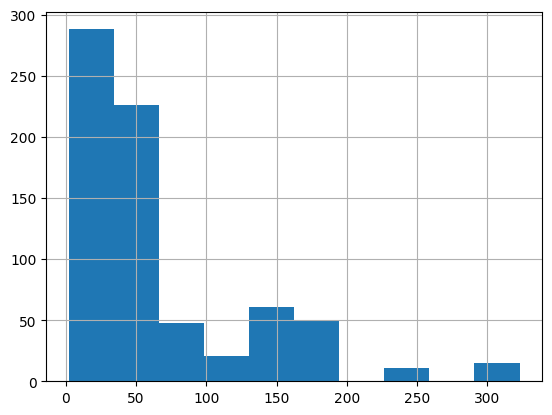

In [15]:
df.age.hist()

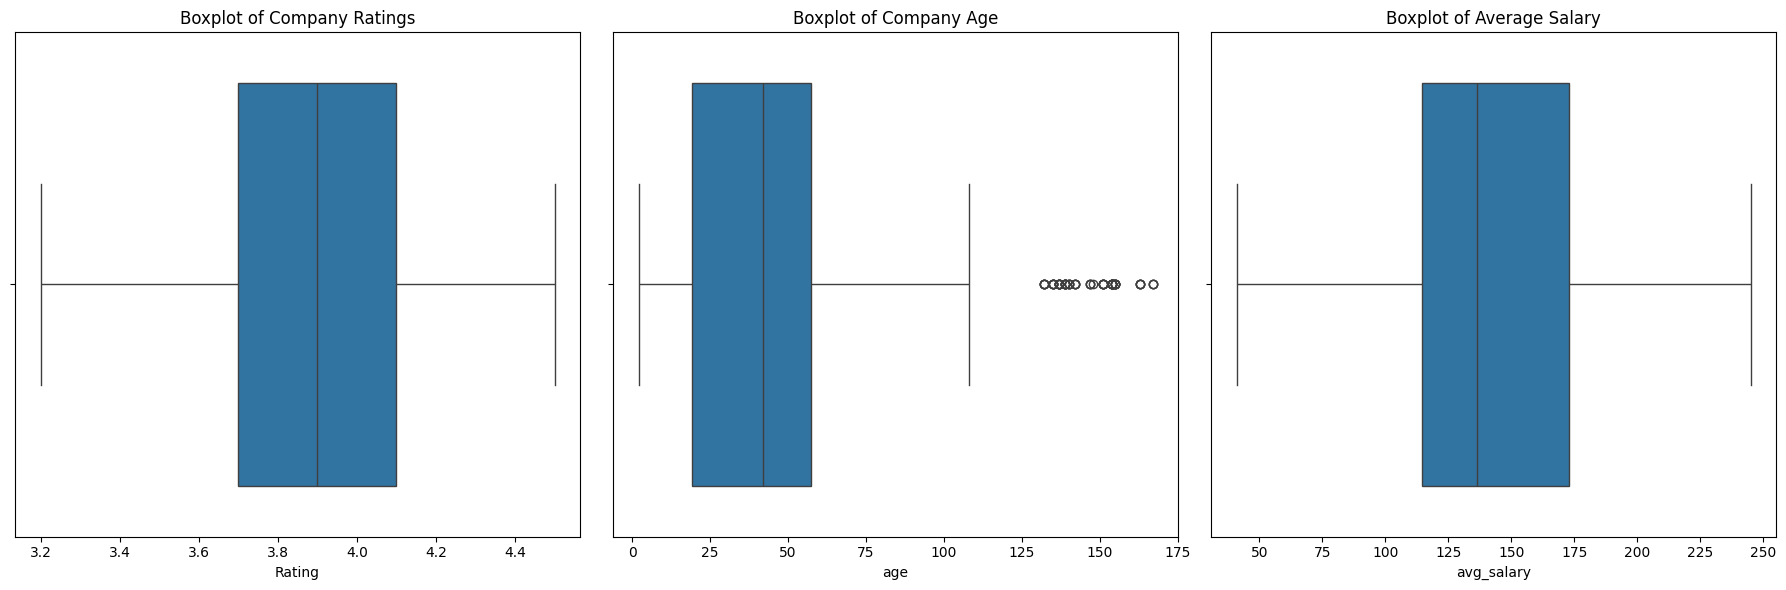

In [16]:


# Function to remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for Rating, Age, and Avg Salary
salary_data_no_outliers = df.copy()
salary_data_no_outliers = remove_outliers(salary_data_no_outliers, 'Rating')
salary_data_no_outliers = remove_outliers(salary_data_no_outliers, 'age')
salary_data_no_outliers = remove_outliers(salary_data_no_outliers, 'avg_salary')

# Set up the matplotlib figure
plt.figure(figsize=(18, 6))

# Boxplot for Rating
plt.subplot(1, 3, 1)
sns.boxplot(data=salary_data_no_outliers, x='Rating')
plt.title('Boxplot of Company Ratings')

# Boxplot for Age
plt.subplot(1, 3, 2)
sns.boxplot(data=salary_data_no_outliers, x='age')
plt.title('Boxplot of Company Age')

# Boxplot for Avg Salary
plt.subplot(1, 3, 3)
sns.boxplot(data=salary_data_no_outliers, x='avg_salary')
plt.title('Boxplot of Average Salary')

plt.tight_layout()
plt.show()


In [17]:
df[['age','avg_salary','Rating','desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,-0.396757,0.142737,0.134159
avg_salary,-0.396757,1.000000,-0.004090,-0.226572
Rating,0.142737,-0.004090,1.000000,0.032462
desc_len,0.134159,-0.226572,0.032462,1.000000


<Axes: >

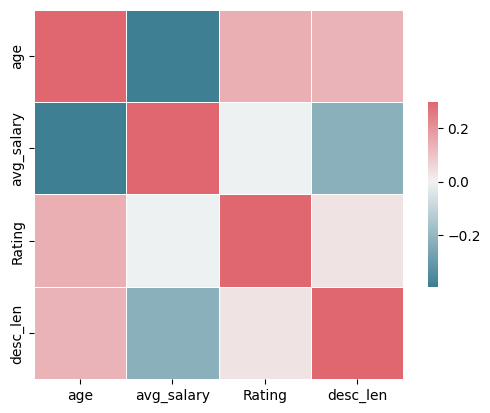

In [18]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [19]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Skills', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'min_salary', 'max_salary',
       'avg_salary', 'company_txt', 'job_state', 'age', 'python_yn', 'R_yn',
       'spark', 'cloud', 'excel', 'sql', 'machine_learning', 'statistics',
       'salary_range', 'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [20]:
df_cat = df[[ 'Size', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'job_state', 'age', 'python_yn', 'R_yn',
       'spark', 'cloud', 'excel', 'sql', 'machine_learning', 'statistics', 'job_simp', 'seniority']]

graph for Size: total = 9


C:\Users\hp\AppData\Local\Temp\ipykernel_11492\2042905890.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


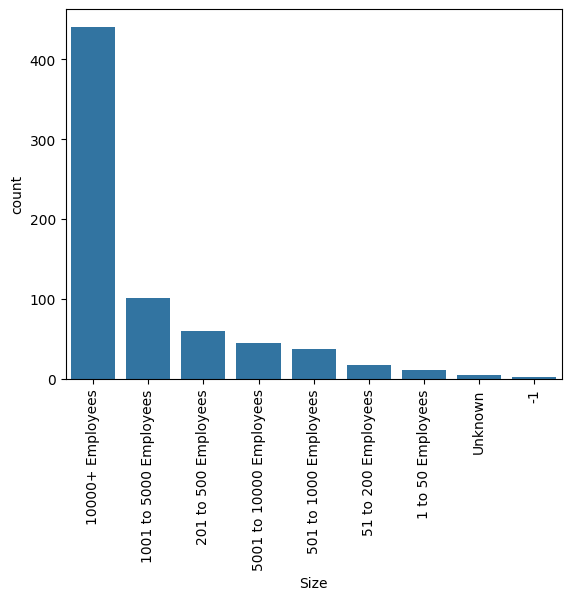

graph for Type of ownership: total = 8


C:\Users\hp\AppData\Local\Temp\ipykernel_11492\2042905890.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


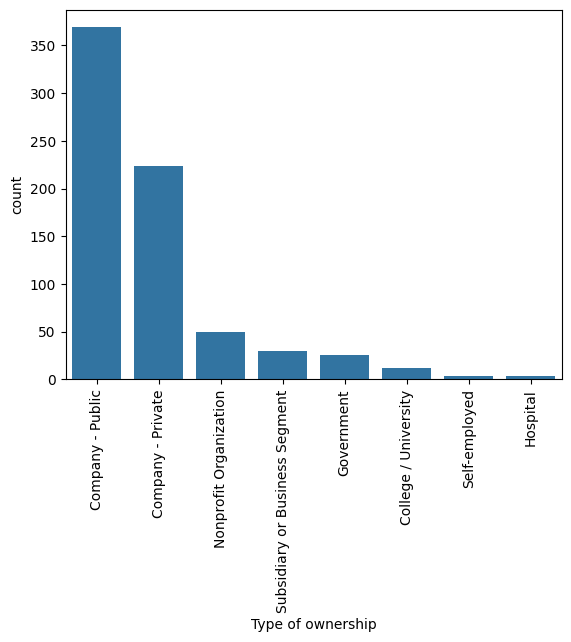

graph for Industry: total = 36


C:\Users\hp\AppData\Local\Temp\ipykernel_11492\2042905890.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


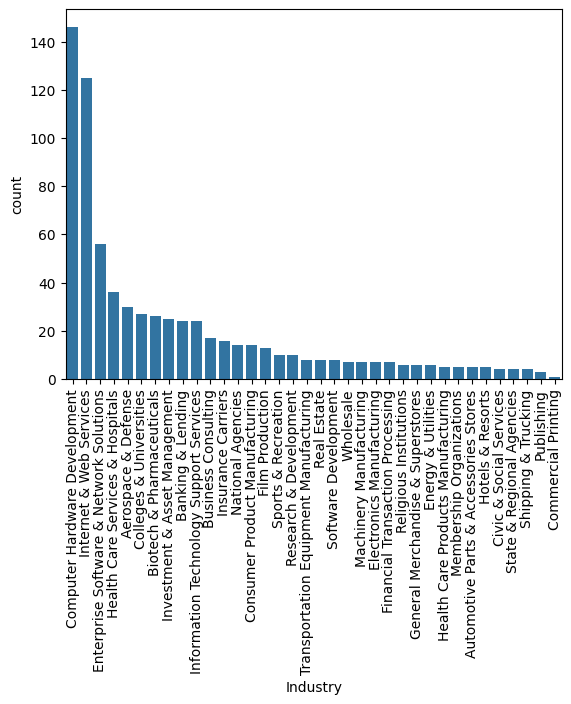

C:\Users\hp\AppData\Local\Temp\ipykernel_11492\2042905890.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


graph for Sector: total = 18


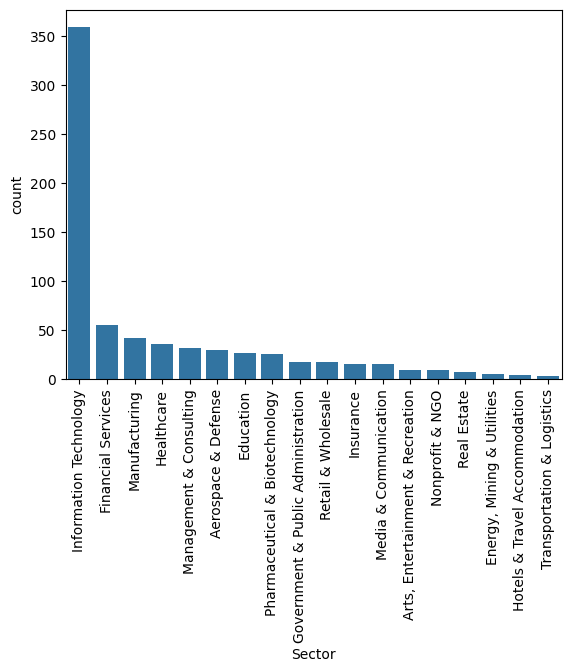

graph for Revenue: total = 8


C:\Users\hp\AppData\Local\Temp\ipykernel_11492\2042905890.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


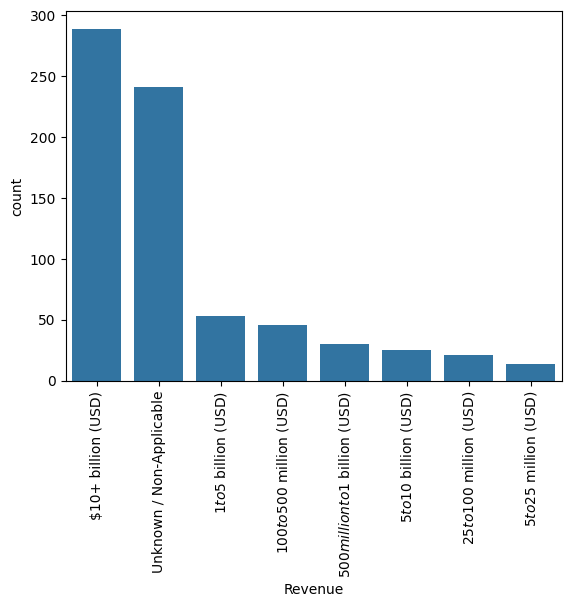

graph for job_state: total = 24


C:\Users\hp\AppData\Local\Temp\ipykernel_11492\2042905890.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


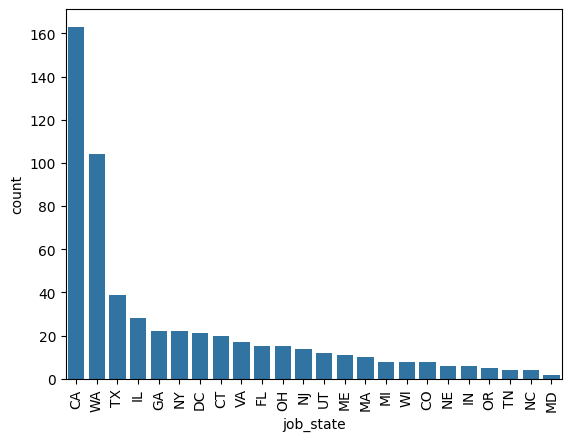

graph for age: total = 84


C:\Users\hp\AppData\Local\Temp\ipykernel_11492\2042905890.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


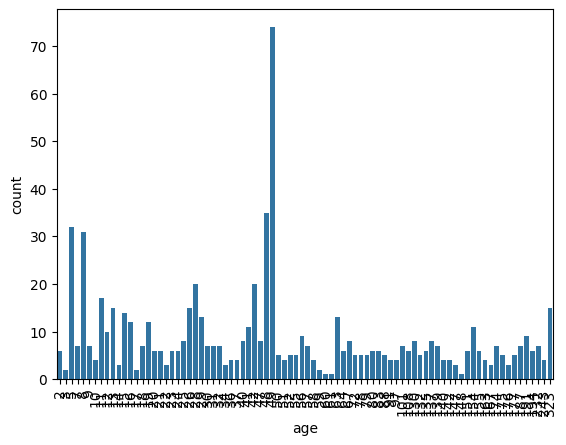

graph for python_yn: total = 2


C:\Users\hp\AppData\Local\Temp\ipykernel_11492\2042905890.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


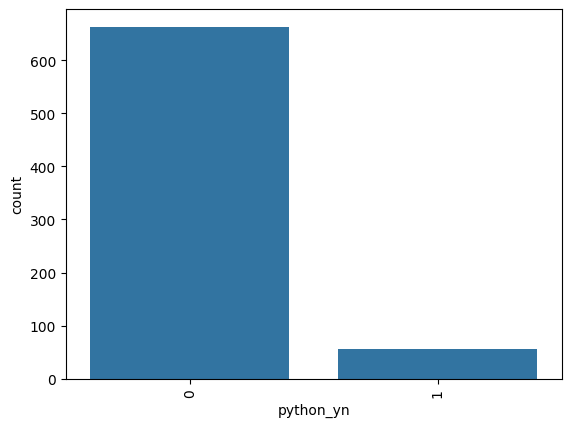

graph for R_yn: total = 2


C:\Users\hp\AppData\Local\Temp\ipykernel_11492\2042905890.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


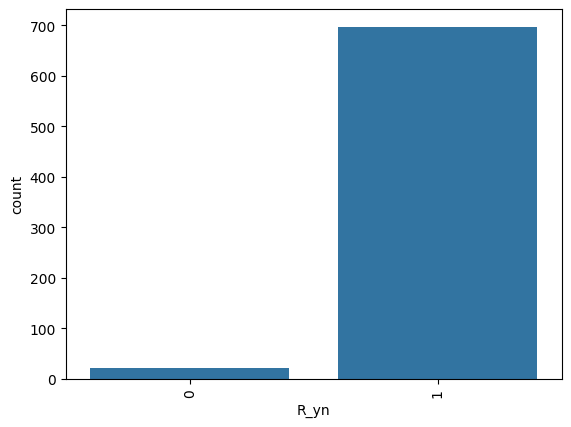

graph for spark: total = 2


C:\Users\hp\AppData\Local\Temp\ipykernel_11492\2042905890.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


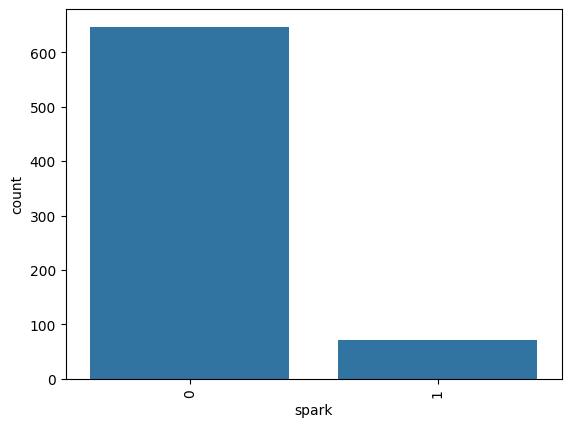

graph for cloud: total = 2


C:\Users\hp\AppData\Local\Temp\ipykernel_11492\2042905890.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


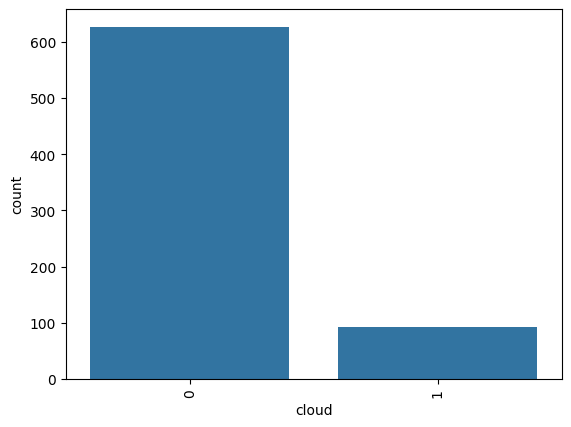

graph for excel: total = 1


C:\Users\hp\AppData\Local\Temp\ipykernel_11492\2042905890.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


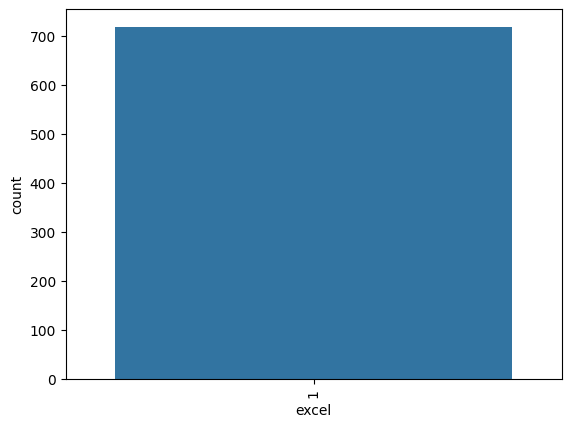

graph for sql: total = 2


C:\Users\hp\AppData\Local\Temp\ipykernel_11492\2042905890.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


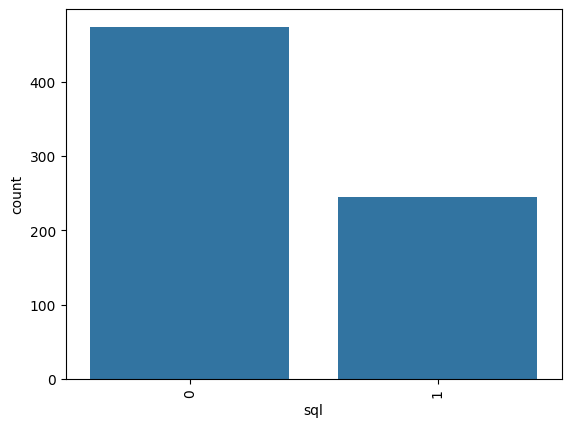

graph for machine_learning: total = 2


C:\Users\hp\AppData\Local\Temp\ipykernel_11492\2042905890.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


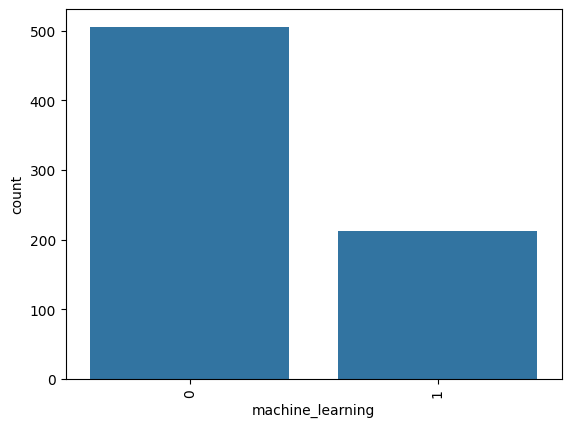

graph for statistics: total = 2


C:\Users\hp\AppData\Local\Temp\ipykernel_11492\2042905890.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


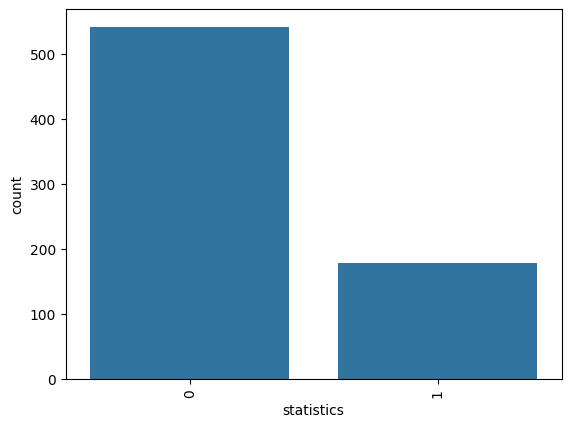

graph for job_simp: total = 4


C:\Users\hp\AppData\Local\Temp\ipykernel_11492\2042905890.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


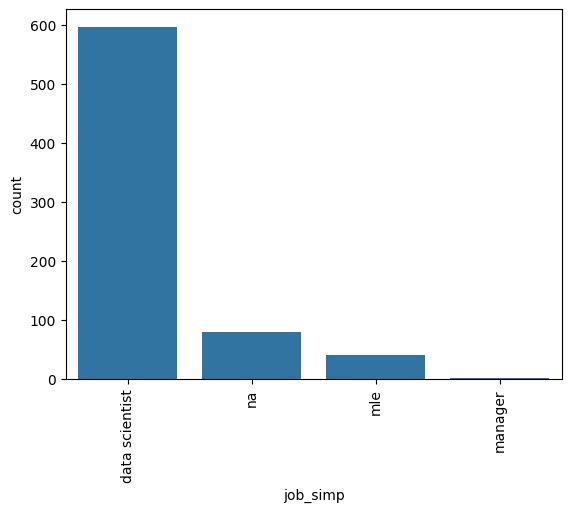

graph for seniority: total = 2


C:\Users\hp\AppData\Local\Temp\ipykernel_11492\2042905890.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


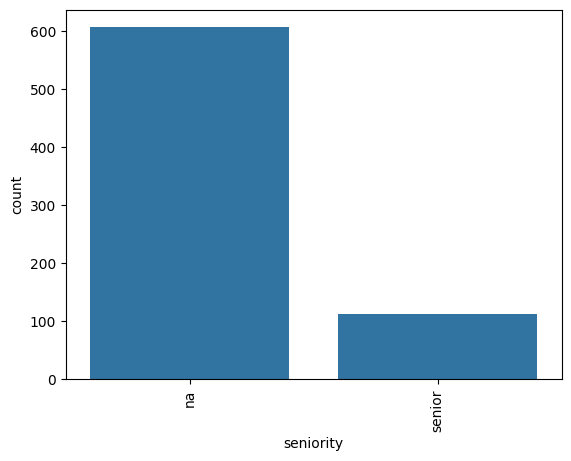

In [21]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [22]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')


,avg_salary
job_simp,
data scientist,138.685503
manager,183.500000
mle,171.634146
na,141.201013


In [23]:
pd.pivot_table(df, index = ['job_simp','seniority'], values = 'avg_salary')


avg_salary
job_simp       seniority            
data scientist na         135.439247
               senior     155.015152
manager        na         183.500000
mle            na         170.700000
               senior     209.000000
na             na         133.080299
               senior     186.541667

In [24]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary').sort_values('job_state', ascending = False)


avg_salary
job_state job_simp                  
WI        mle             114.000000
          data scientist  116.000000
WA        na              171.475000
          mle             167.000000
          data scientist  148.843750
VA        data scientist  113.764706
UT        data scientist   81.742500
TX        data scientist  126.089744
TN        data scientist  125.500000
OR        data scientist  123.500000
OH        na              100.000000
          data scientist  110.722222
NY        na              226.500000
          mle             209.000000
          data scientist  172.718750
NJ        data scientist  122.000000
NE        data scientist   87.500000
NC        data scientist  136.000000
MI        data scientist   95.000000
ME        data scientist  104.727273
MD        na              132.500000
MA        data scientist  133.800000
IN        data scientist  102.500000
IL        na               97.500000
          mle             155.500000
          data scientist  123.550000
GA        data scientist  120.776176
          na              128.500000
FL        data scientist  101.133333
DC        mle             143.000000
          data scientist   88.972222
CT        data scientist  104.250000
CO        na               90.000000
          data scientist  240.000000
CA        mle             191.115385
          manager         180.000000
          na              134.807500
          data scientist  174.249120

In [25]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [26]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)

avg_salary
job_state job_simp                  
WI        mle                      3
          data scientist           5
WA        na                      20
          mle                      4
          data scientist          80
VA        data scientist          17
UT        data scientist          12
TX        data scientist          39
TN        data scientist           4
OR        data scientist           5
OH        na                       6
          data scientist           9
NY        na                       5
          mle                      1
          data scientist          16
NJ        data scientist          14
NE        data scientist           6
NC        data scientist           4
MI        data scientist           8
ME        data scientist          11
MD        na                       2
MA        data scientist          10
IN        data scientist           6
IL        na                       4
          mle                      4
          data scientist          20
GA        data scientist          17
          na                       5
FL        data scientist          15
DC        mle                      3
          data scientist          18
CT        data scientist          20
CO        na                       4
          data scientist           4
CA        mle                     13
          manager                  1
          na                      24
          data scientist         125

In [27]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
CO,240.000000
CA,174.249120
NY,172.718750
WA,148.843750
NC,136.000000
MA,133.800000
TX,126.089744
TN,125.500000
IL,123.550000


In [28]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'hourly', 'python_yn', 'R_yn', 'spark', 'cloud', 'excel','sql','machine_learning','statistics' ,'Type of ownership','avg_salary']]
for column in df_pivots.columns:
    if column != 'avg_salary':  # Skip 'avg_salary' itself
        pivot_table = pd.pivot_table(df_pivots, index=column, values='avg_salary').sort_values('avg_salary', ascending=False)
        print(f"Pivot table for column '{column}':")
        print(pivot_table)
        print("\n")


Pivot table for column 'Rating':
        avg_salary
Rating            
-1.0    220.000000
 4.3    208.900000
 4.7    198.000000
 2.5    197.500000
 3.3    168.093023
 4.0    161.944128
 3.4    158.187500
 3.2    152.714286
 3.7    145.250000
 4.4    145.068182
 5.0    145.000000
 4.2    139.086071
 4.1    135.230392
 3.8    132.382075
 3.9    132.342295
 3.5    128.180000
 3.6    113.885094
 4.5    112.928571
 3.1     99.800000
 2.7     68.000000


Pivot table for column 'Industry':
                                         avg_salary
Industry                                           
Financial Transaction Processing         232.142857
Electronics Manufacturing                228.000000
Software Development                     194.687500
General Merchandise & Superstores        187.500000
Internet & Web Services                  170.152000
Film Production                          169.500000
Computer Hardware Development            161.630137
Investment & Asset Management            158

In [29]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')

python_yn,0,1
Revenue,,
$1 to $5 billion (USD),41.0,12.0
$10+ billion (USD),281.0,8.0
$100 to $500 million (USD),39.0,7.0
$25 to $100 million (USD),21.0,NaN
$5 to $10 billion (USD),25.0,NaN
$5 to $25 million (USD),14.0,NaN
$500 million to $1 billion (USD),30.0,NaN
Unknown / Non-Applicable,212.0,29.0


In [34]:
import nltk

# Download the required NLTK data files
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

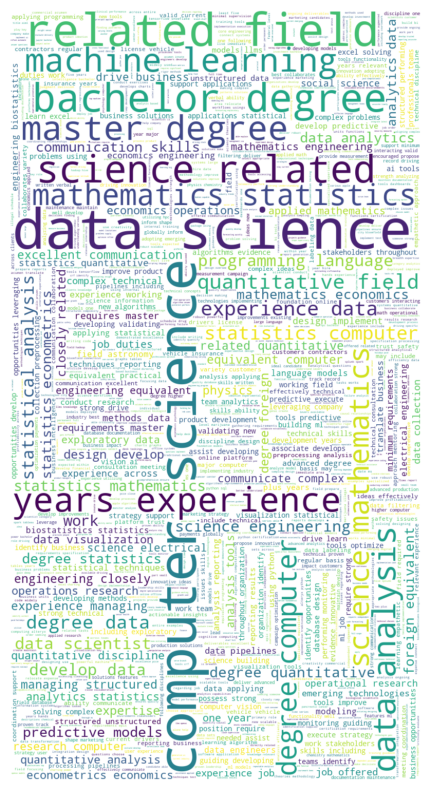

In [35]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [36]:
df.to_csv('eda_data.csv')